In [6]:
%pylab inline
from scipy.special import erf 

Populating the interactive namespace from numpy and matplotlib


In [13]:
#Define parameters
Fo = 0.5
#Create grid
nt = 100
nx = 100
#set physical parameters
km_to_m = 1000.
L = 100*km_to_m #100 km, converted to m
kappa = 1. /(1000.*1000.)# thermal diffusivity 1 mm^2/s, converted to m^2/s
dx = L/nx
dt = Fo*dx**2/kappa
sec_per_year = 60*60*24*365
t = arange(nt)*dt/sec_per_year 
x = arange(nx)*dx/km_to_m
T_hot = 1600.

T = zeros([nt, nx])
#Set initial condition
T_init = 1.
T_ocean = 0.
T[0,:] = T_init
#Set boundary conditions
T[:,0] = T_ocean 
T[:,-1] = T_init
#Loop through solution
for n in arange(nt-1):
    T[n+1,1:-1] = Fo*T[n,2:] + (1 - 2*Fo)*T[n,1:-1] + Fo*T[n,0:-2]

#Convert to temp C
T = T*T_hot

Text(0, 0.5, 'Temperature (C)')

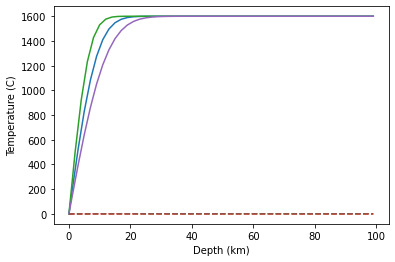

In [27]:
def T_ana(n):
    j = arange(nx)
    return T_ocean + (T_init - T_ocean)*erf(0.5*sqrt(j**2/(Fo*n)))


plot(x, T[50,:])
plot(x, T_ana(50), '--')
plot(x, T[25,:])
plot(x, T_ana(25), '--')
plot(x, T[90,:])
plot(x, T_ana(90), '--')
#plot(T[99,:])
xlabel('Depth (km)')
ylabel('Temperature (C)')


Depth of 1200 C isotherm= 8.0


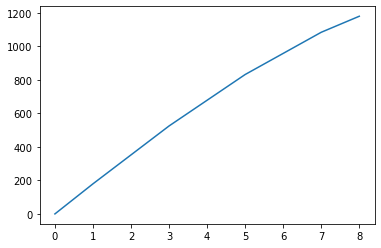

In [32]:
T_50 = T[50,:]
plot(x[T_50<1200], T_50[T_50<1200])

x_above_1200 = x[T_50<1200]
depth_1200 = x_above_1200[-1]
print('Depth of 1200 C isotherm=',depth_1200)

Text(0, 0.5, 'temperature')

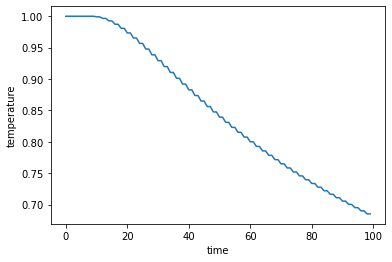

In [22]:
plot(T[:,10])
xlabel('time')
ylabel('temperature')

## Boolean indexing

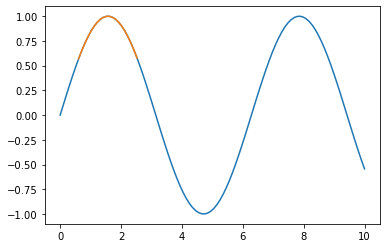

In [25]:
x = linspace(0,10,100)
#print(x)
y = sin(x)
plot(x,y)

x_peak = x[y>0.5]
y_peak = y[y>0.5]
plot(x_peak, y_peak)

array([ 4.44444444,  5.55555556,  6.66666667,  7.77777778,  8.88888889,
       10.        ])

In [26]:
from scipy.linalg import solve_banded


#Define parameters
Fo = 20.
#Create grid
nt = 100
nx = 100
#set physical parameters
km_to_m = 1000.
L = 100*km_to_m #100 km, converted to m
kappa = 1. /(1000.*1000.)# thermal diffusivity 1 mm^2/s, converted to m^2/s
dx = L/nx
dt = Fo*dx**2/kappa
sec_per_year = 60*60*24*365
t = arange(nt)*dt/sec_per_year 
x = arange(nx)*dx/km_to_m
T_hot = 1600.

T = zeros([nt, nx])
#Set initial condition
T_init = 1.
T_ocean = 0.
T[0,:] = T_init

A_upper = -Fo*ones(nx-2)
A_upper[0] = 0. 
A_lower = -Fo*ones(nx-2)
A_lower[-1] = 0. 
A_mid = (1+2*Fo)*ones(nx-2)
A = vstack((A_upper, A_mid, A_lower))

#Loop through solution
for n in arange(nt-1):
    b = T[n,1:-1]
    b[0] += Fo*T_ocean
    b[-1] += Fo*T_init       
    T[n+1, 1:-1] = solve_banded((1,1), A, b)
    
    #T[n+1,1:-1] = Fo*T[n,2:] + (1 - 2*Fo)*T[n,1:-1] + Fo*T[n,0:-2]

#Convert to temp C
#T = T*T_hot

Text(0, 0.5, 'Temperature (C)')

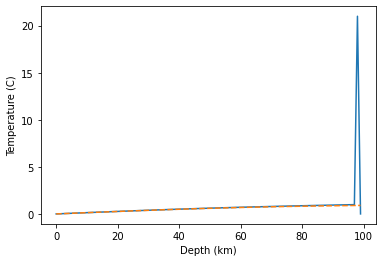

In [29]:
def T_ana(n):
    j = arange(nx)
    return T_ocean + (T_init - T_ocean)*erf(0.5*sqrt(j**2/(Fo*n)))


plot(x, T[90,:])
plot(x, T_ana(90), '--')
#plot(x, T[25,:])
#plot(x, T_ana(25), '--')
#plot(x, T[90,:])
#plot(x, T_ana(90), '--')
#plot(T[99,:])
xlabel('Depth (km)')
ylabel('Temperature (C)')

In [16]:
T[0,:]

array([1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600.,
       1600., 1600., 1600., 1600., 1600., 1600., 1600., 1600., 2400.,
       1600.])